# Gráficos


In [1]:
import pandas as pd
import numpy as np
import pyreadr


#plots library

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
# Set Directorio y leyendo datos
user = os.getlogin()   # Username
os.chdir(f"C:/Users/{user}/Documents/GitHub") # Set directorio
data_env = pyreadr.read_r("1ECO35_2022_2/data/wage2015_subsample_inference.Rdata") # Subir base de datos

In [3]:
data = data_env[ 'data' ].reset_index(drop=True)    

In [4]:
data # esta será nuestra base de datos

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
1,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
2,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4
3,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12
4,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.81,0.729,0.6561,4700,16,4970,9
5146,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.44,1.728,2.0736,4110,13,8680,20
5147,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,1.21,1.331,1.4641,1550,4,3680,6
5148,32.967033,3.495508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,1.00,1.000,1.0000,2920,9,6570,11


# 1) Histograma

### Histograma de frecuencias absolutas del salario

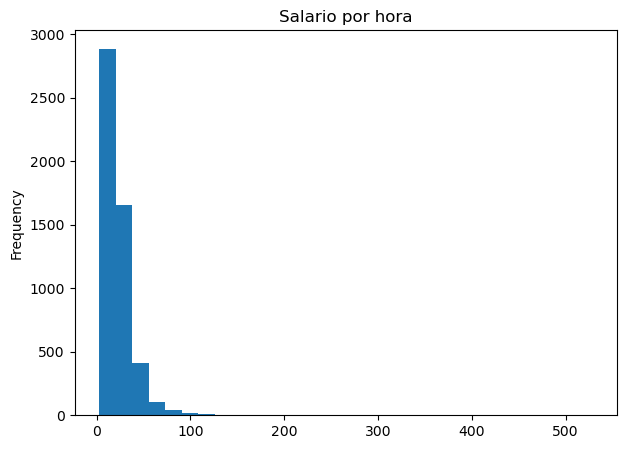

In [5]:
fig, ax = plt.subplots( figsize=(7,5) )            # definiendo objeto figura

data['wage'].plot(kind = 'hist', bins = 30)  # plotear salario
plt.title('Salario por hora')

plt.show()

# el gráfico muestra el número de personas que tienen un salario igual a cada uno de esos rangos

### Histograma de frecuencias absolutas del logaritmo del salario

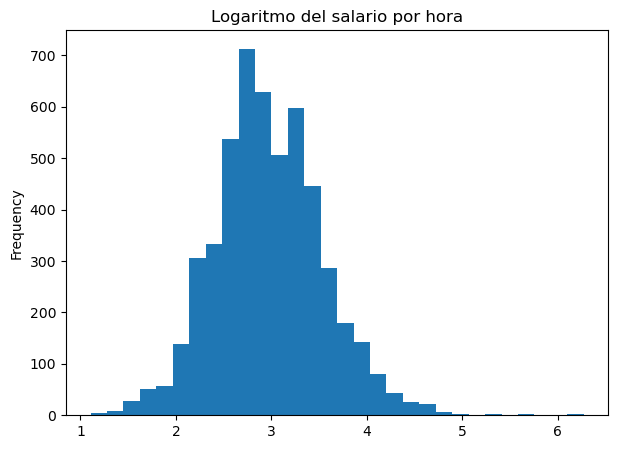

In [6]:
fig, ax = plt.subplots( figsize=(7,5) )            # definiendo objeto figura

data['lwage'].plot(kind = 'hist', bins = 30)  # plotear salario
plt.title('Logaritmo del salario por hora')

plt.show()

Comentario:

Luego de graficar ambos histogramas queda claro que el segundo, en el que se emplea el logaritmo de los salarios (lwage), es el más recomendable. Esto se debe a que el eje x se reduce y es observa mejor el gráfico. De la misma forma, se observa que el logaritmo del salario se semejaría a una normal.

# 2) Gráfico de densidad

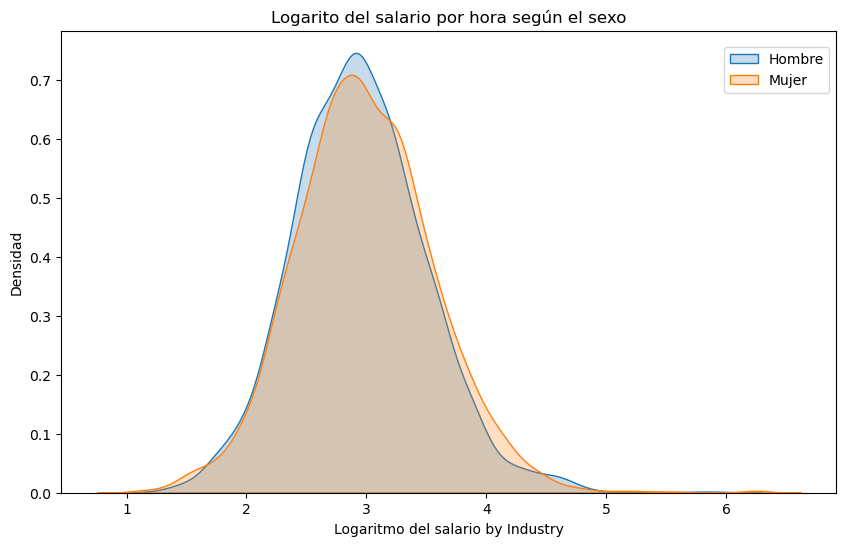

In [7]:
plt.figure(figsize=(10, 6))

# Adding densities 

sns.kdeplot(data.lwage[data.sex==1], label='Construcción', shade=True)
sns.kdeplot(data.lwage[data.sex==0], label='Minería ', shade=True)

plt.legend(labels=['Hombre','Mujer'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.98))

plt.title('Logarito del salario por hora según el sexo')
plt.xlabel('Logaritmo del salario by Industry')
plt.ylabel('Densidad')
plt.show()

# 3) Gráfico Pie

In [8]:
# Agrupamos las dummies y obtenemos su tamaño
base = data.groupby(['shs','hsg','scl','clg','ad']).size()
base

shs  hsg  scl  clg  ad 
0.0  0.0  0.0  0.0  1.0     706
               1.0  0.0    1636
          1.0  0.0  0.0    1432
     1.0  0.0  0.0  0.0    1256
1.0  0.0  0.0  0.0  0.0     120
dtype: int64

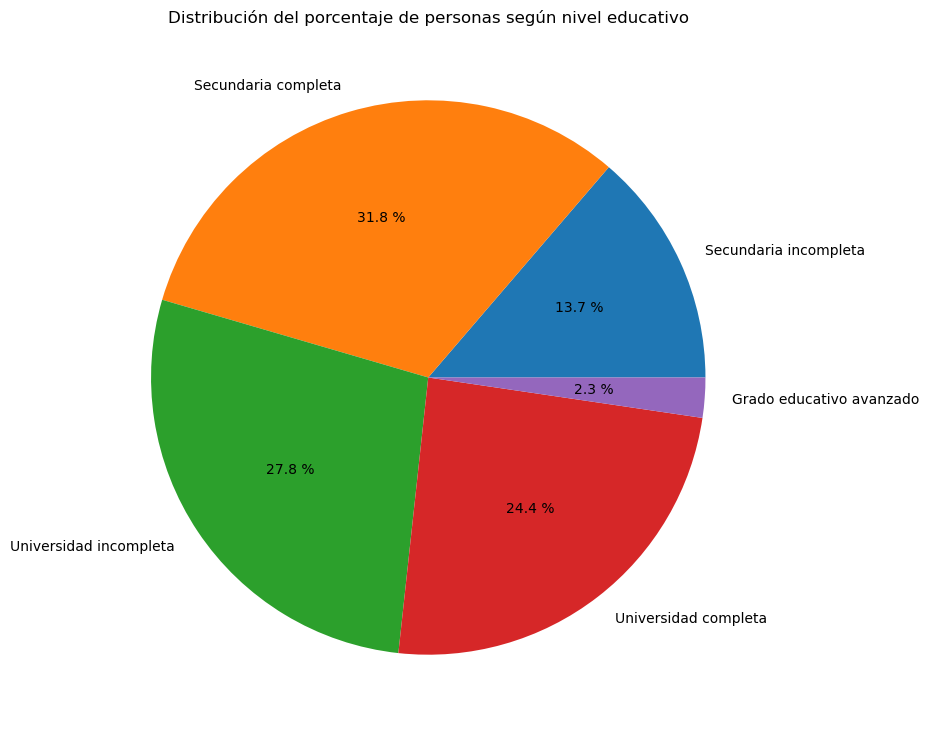

In [9]:
# Le damos nombres a las partes del gráfico

labels=['Secundaria incompleta', 'Secundaria completa' , 'Universidad incompleta', 'Universidad completa', 'Grado educativo avanzado']

# Generamos el gráfico pie
plt.figure(figsize=(9,9)) # tamaño de gráfico 

ax = plt.pie(base, labels=labels, autopct='%.1f %%')
plt.title('Distribución del porcentaje de personas según nivel educativo')
plt.show()

# 4) Diagrama de cajas

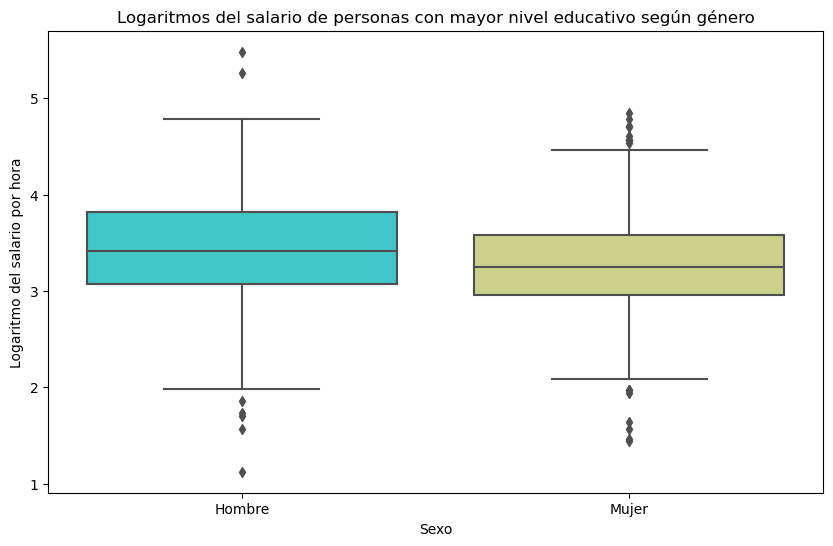

In [10]:
# Generamos el gráfico solicitado

fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(data = data[data.ad == 1], x='sex', y='lwage', palette='rainbow')
(box.set_xticklabels(["Hombre", "Mujer"])) # etiqueta del eje x 

plt.title('Logaritmos del salario de personas con mayor nivel educativo según género')
plt.xlabel('Sexo')
plt.ylabel('Logaritmo del salario por hora')
plt.show()